In [1]:
from __future__ import print_function
import torch
import torch.optim as optim
from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import git
import sys

In [ ]:
# Clone the repository
git.Repo.clone_from("https://github.com/dusaurabh/Saurabh-ERA-V2-Master.git", "Saurabh-ERA-V2-Master")

In [7]:
cd Saurabh-ERA-V2-Master

E:\Courses\ERA V2 Assignments\S11\Saurabh-ERA-V2-Master


D:\Softwares\anaconda3\envs\pytorch-gpu\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
!git pull origin main

Updating a84b907..d489b70
Fast-forward
 utils.py | 1 +
 1 file changed, 1 insertion(+)


From https://github.com/dusaurabh/Saurabh-ERA-V2-Master
 * branch            main       -> FETCH_HEAD
   a84b907..d489b70  main       -> origin/main


In [9]:
cd ..

E:\Courses\ERA V2 Assignments\S11


In [10]:
# Get the full path to the repository directory
repo_path = os.path.abspath('Saurabh-ERA-V2-Master')

# Append the repository path
sys.path.append(repo_path)

# Check the contents of the directory
print(os.listdir(repo_path))

['.git', 'Assignment_10', 'Assignment_11', 'main.py', 'Miscellaneous', 'models', 'One_Cycle_Policy', 'README.md', 'utils.py', '__pycache__']


In [11]:
import models
from models.Assignment_11_models import ResNet18
from utils import train_test_data_loader, get_training_images, get_misclassified_images, grad_cam_func
from main import CIFAR10Dataset, train, test, train_func, test_func

PermissionError: [WinError 5] Access is denied: 'GRAD-CAM\\.git\\objects\\pack\\pack-aaba71ca4ac533db699c03f0092491a03938d9b1.idx'. Retrying deletion in 1 seconds...
PermissionError: [WinError 5] Access is denied: 'GRAD-CAM\\.git\\objects\\pack\\pack-aaba71ca4ac533db699c03f0092491a03938d9b1.idx'. Retrying deletion in 1 seconds...
PermissionError: [WinError 5] Access is denied: 'GRAD-CAM\\.git\\objects\\pack\\pack-aaba71ca4ac533db699c03f0092491a03938d9b1.idx'. Retrying deletion in 1 seconds...
Failed to delete directory 'GRAD-CAM' after 3 attempts.
Error: Directory deletion failed. Cloning aborted.
Files already downloaded and verified
Files already downloaded and verified


In [12]:
train_loader, test_loader = train_test_data_loader(train,test)
train_loader_copy, test_loader_copy = train_test_data_loader(train,test)

CUDA Available? True
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


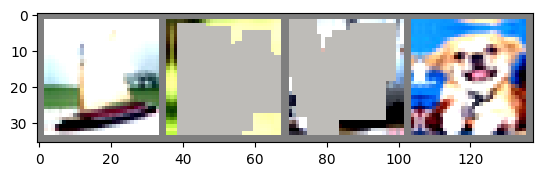

'ship  bird  cat   dog  '

In [13]:
get_training_images(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


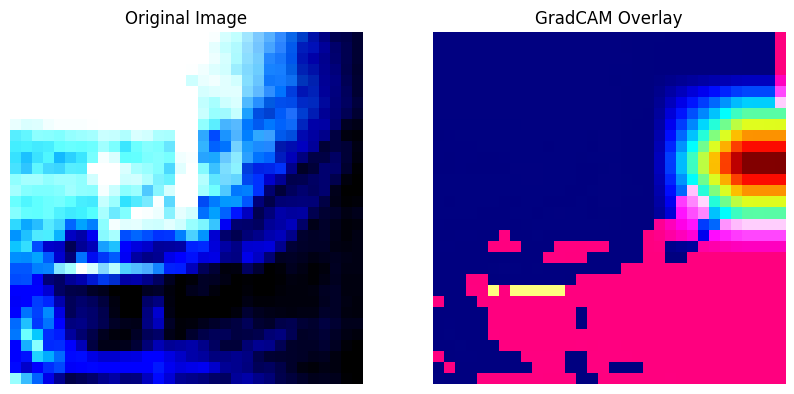

In [16]:
dataiter = iter(test_loader_copy)
images, labels = next(dataiter)
input_images = images[5:6]
grad_cam_func(ResNet18,input_images)

In [17]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
model_copy =  ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [18]:
from torch.optim.lr_scheduler import OneCycleLR

LRMIN = 1.91E-01/100
LRMAX = 1.91E-01
print('LRMIN ',LRMIN)
print('LRMAX ',LRMAX)

LRMIN  0.00191
LRMAX  0.191


In [19]:
optimizer_copy = optim.SGD(model_copy.parameters(), lr=LRMIN)  # Set initial LR to 0.01
scheduler = OneCycleLR(optimizer_copy, max_lr=LRMAX, total_steps=21, epochs=4, steps_per_epoch=len(train_loader), pct_start=0.3, anneal_strategy='linear', div_factor=10.0, three_phase=False, final_div_factor=1e4, base_momentum=0.85, max_momentum=0.95)

EPOCHS = 21
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_func(model_copy, device, train_loader, optimizer_copy, epoch)
    test_func(model_copy, device, test_loader)
    scheduler.step()

EPOCH: 0


Loss=1.628110408782959 Batch_id=97 Accuracy=32.67: 100%|███████████████████████████████| 98/98 [00:48<00:00,  2.01it/s]



Test set: Average loss: 1.6585, Accuracy: 4300/10000 (43.00%)

EPOCH: 1


Loss=1.5407874584197998 Batch_id=97 Accuracy=41.36: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.04it/s]



Test set: Average loss: 1.3707, Accuracy: 5146/10000 (51.46%)

EPOCH: 2


Loss=1.453308343887329 Batch_id=97 Accuracy=47.62: 100%|███████████████████████████████| 98/98 [00:48<00:00,  2.04it/s]



Test set: Average loss: 1.3617, Accuracy: 5261/10000 (52.61%)

EPOCH: 3


Loss=1.2619569301605225 Batch_id=97 Accuracy=52.52: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.04it/s]



Test set: Average loss: 0.9646, Accuracy: 6671/10000 (66.71%)

EPOCH: 4


Loss=1.221360445022583 Batch_id=97 Accuracy=56.49: 100%|███████████████████████████████| 98/98 [00:48<00:00,  2.03it/s]



Test set: Average loss: 1.0224, Accuracy: 6642/10000 (66.42%)

EPOCH: 5


Loss=1.1111844778060913 Batch_id=97 Accuracy=59.75: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.01it/s]



Test set: Average loss: 0.7428, Accuracy: 7439/10000 (74.39%)

EPOCH: 6


Loss=0.9983904957771301 Batch_id=97 Accuracy=62.20: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.03it/s]



Test set: Average loss: 0.7740, Accuracy: 7469/10000 (74.69%)

EPOCH: 7


Loss=1.049936056137085 Batch_id=97 Accuracy=64.49: 100%|███████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.7740, Accuracy: 7405/10000 (74.05%)

EPOCH: 8


Loss=0.9728438258171082 Batch_id=97 Accuracy=66.19: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.6908, Accuracy: 7647/10000 (76.47%)

EPOCH: 9


Loss=0.9013978242874146 Batch_id=97 Accuracy=67.56: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.03it/s]



Test set: Average loss: 0.6814, Accuracy: 7719/10000 (77.19%)

EPOCH: 10


Loss=0.912780225276947 Batch_id=97 Accuracy=68.01: 100%|███████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.5136, Accuracy: 8275/10000 (82.75%)

EPOCH: 11


Loss=0.7966771721839905 Batch_id=97 Accuracy=69.95: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.03it/s]



Test set: Average loss: 0.5381, Accuracy: 8198/10000 (81.98%)

EPOCH: 12


Loss=0.8216841816902161 Batch_id=97 Accuracy=70.41: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.03it/s]



Test set: Average loss: 0.6071, Accuracy: 7993/10000 (79.93%)

EPOCH: 13


Loss=0.7563823461532593 Batch_id=97 Accuracy=71.94: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.5284, Accuracy: 8271/10000 (82.71%)

EPOCH: 14


Loss=0.6970522999763489 Batch_id=97 Accuracy=72.61: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.4390, Accuracy: 8485/10000 (84.85%)

EPOCH: 15


Loss=0.7982677221298218 Batch_id=97 Accuracy=73.16: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.4829, Accuracy: 8363/10000 (83.63%)

EPOCH: 16


Loss=0.6967378258705139 Batch_id=97 Accuracy=74.01: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.01it/s]



Test set: Average loss: 0.4179, Accuracy: 8585/10000 (85.85%)

EPOCH: 17


Loss=0.7173889875411987 Batch_id=97 Accuracy=74.94: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.3995, Accuracy: 8677/10000 (86.77%)

EPOCH: 18


Loss=0.6627335548400879 Batch_id=97 Accuracy=75.68: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.4063, Accuracy: 8705/10000 (87.05%)

EPOCH: 19


Loss=0.6695505976676941 Batch_id=97 Accuracy=76.87: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.3481, Accuracy: 8854/10000 (88.54%)

EPOCH: 20


Loss=0.6456969976425171 Batch_id=97 Accuracy=77.24: 100%|██████████████████████████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.3286, Accuracy: 8919/10000 (89.19%)



# Misclassification Code

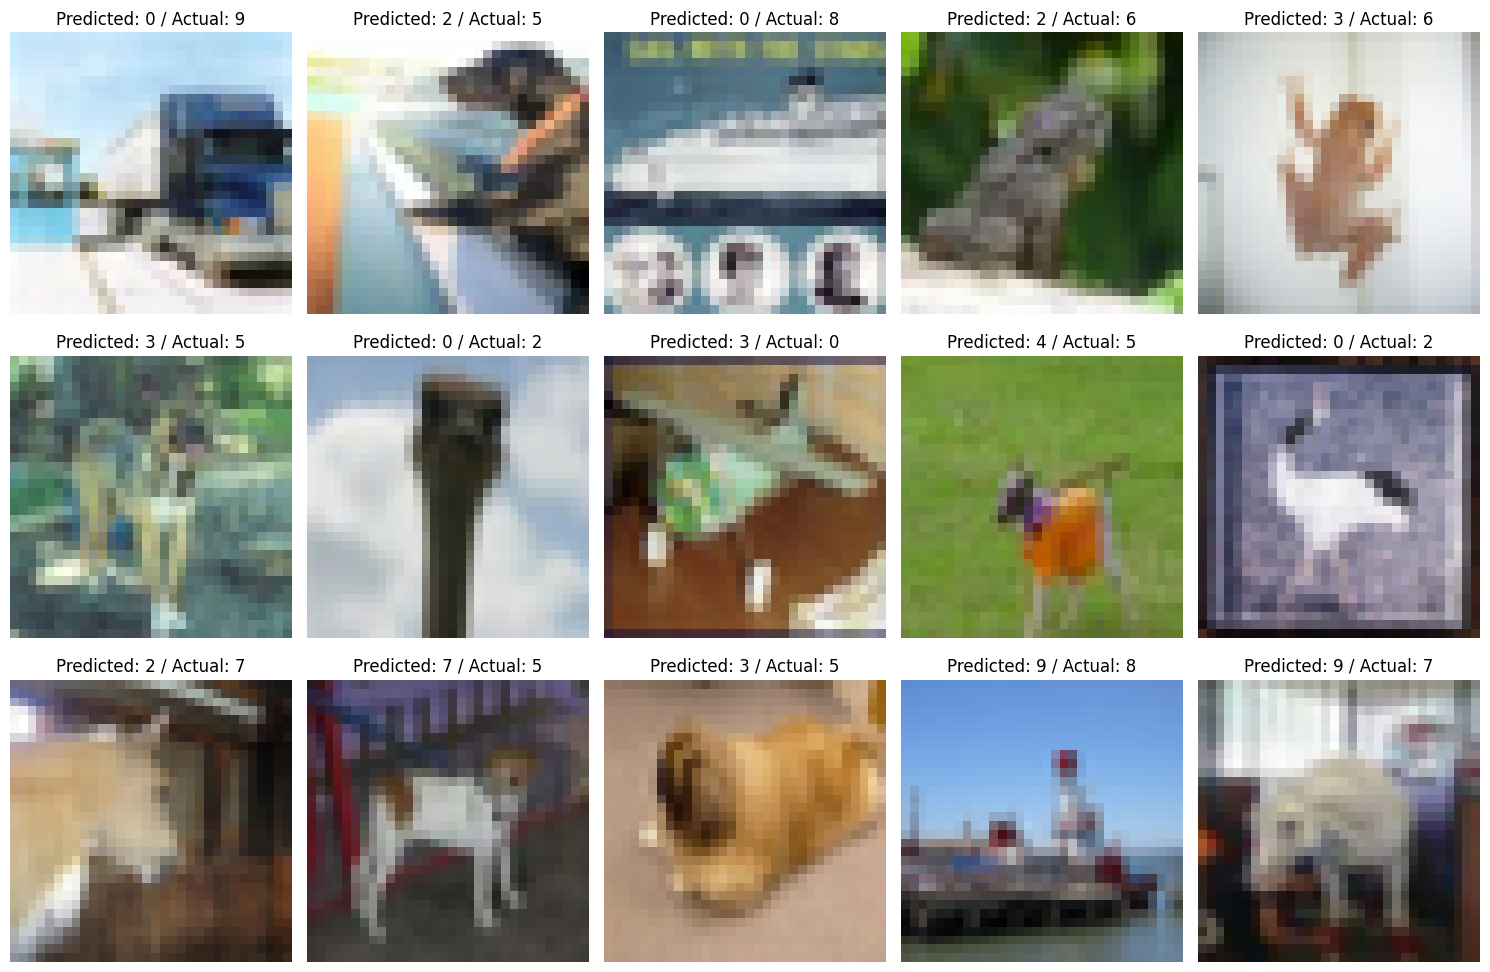

In [20]:
# Get misclassified images
misclassified_images = get_misclassified_images(model_copy, test_loader, device)


def show_misclassified_images():
    # Display misclassified images
    fig, axs = plt.subplots(3, 5, figsize=(15, 10))
    for i, (img, pred, target) in enumerate(misclassified_images):
        if i < 15:  # Ensure we don't exceed the number of subplots
            row = i // 5
            col = i % 5
    
            img = img.cpu().numpy().transpose((1, 2, 0))  # Convert to numpy and transpose dimensions
            mean = np.array([0.4914, 0.4822, 0.4465])
            std = np.array([0.2470, 0.2434, 0.2615])
            img = std * img + mean  # Unnormalize
            img = np.clip(img, 0, 1)  # Clip to [0, 1]
            axs[row, col].imshow(img)
            axs[row, col].set_title(f'Predicted: {pred.item()} / Actual: {target.item()}')
            axs[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

show_misclassified_images()

In [ ]:
pip install grad-cam

In [ ]:
# Clone the repository
import git
git.Repo.clone_from("https://github.com/jacobgil/pytorch-grad-cam.git","GRAD-CAM")